In [70]:
import math
import numpy as np
import datetime
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib import style
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [121]:
co2 = pd.read_csv('co2.csv',index_col=0)
# Create model object
co2.index = pd.DatetimeIndex(co2.index.values,
                               freq='MS')

model = SARIMAX(co2['CO2_ppm'], 
                order=(1,1,1), 
                seasonal_order=(0,1,1,12), 
                trend='c')
# Fit model
results = model.fit()

# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates

dates = mean.index
co2

,CO2_ppm
1958-03-01,315.71
1958-04-01,317.45
1958-05-01,317.50
1958-06-01,317.10
1958-07-01,315.86
1958-08-01,314.93
1958-09-01,313.20
1958-10-01,312.66
1958-11-01,313.33
1958-12-01,314.67


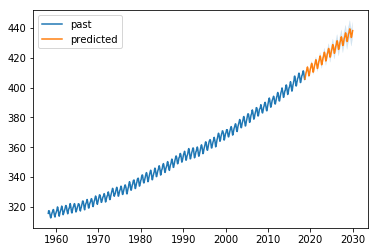

In [118]:
plt.figure()

# Plot past CO2 levels
plt.plot(co2.index.values, co2.values, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()

In [119]:
# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])

438.1958013777322
lower CO2_ppm    432.111676
upper CO2_ppm    444.279927
Name: 2030-01-01 00:00:00, dtype: float64
